In [1]:
!pip3 install scikit-learn --upgrade --user

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [5]:
df= pd.read_csv(url)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
missing_data= df.isnull()
missing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

date
False    21613
Name: date, dtype: int64
 
price
False    21613
Name: price, dtype: int64
 
bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64
 
bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64
 
sqft_living
False    21613
Name: sqft_living, dtype: int64
 
sqft_lot
False    21613
Name: sqft_lot, dtype: int64
 
floors
False    21613
Name: floors, dtype: int64
 
waterfront
False    21613
Name: waterfront, dtype: int64
 
view
False    21613
Name: view, dtype: int64
 
condition
False    21613
Name: condition, dtype: int64
 
grade
False    21613
Name: grade, dtype: int64
 
sqft_above
False    21613
Name: sqft_above, dtype: int64
 
sqft_basement
False    21613
Name: sqft_basement, dtype: int64
 
yr_built
False    21613
Name: yr_built, dtype: int64
 
yr_renovated
False    21613
Name: yr_renovated, dtype: int64
 
zipcode
False    21613
Name: zipcode, dtype: int64
 
lat
False    21613
Name: lat, dtype: int64
 
long
False    21613
Name: long, dtype: int6

In [11]:
avg_bed=  df['bedrooms'].mean(axis=0)
print(avg_bed)
avg_bat= df['bathrooms'].mean(axis=0)
print(avg_bat)

3.37287037037037
2.1157362403369904


In [12]:
df['bedrooms'].replace(np.nan, avg_bed, inplace=True)

In [13]:
df['bathrooms'].replace(np.nan, avg_bat, inplace=True)

In [15]:
checking_data= df.isnull()
checking_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
for column in checking_data.columns.values.tolist():
    print(column)
    print(checking_data[column].value_counts())
    print(" ")

date
False    21613
Name: date, dtype: int64
 
price
False    21613
Name: price, dtype: int64
 
bedrooms
False    21613
Name: bedrooms, dtype: int64
 
bathrooms
False    21613
Name: bathrooms, dtype: int64
 
sqft_living
False    21613
Name: sqft_living, dtype: int64
 
sqft_lot
False    21613
Name: sqft_lot, dtype: int64
 
floors
False    21613
Name: floors, dtype: int64
 
waterfront
False    21613
Name: waterfront, dtype: int64
 
view
False    21613
Name: view, dtype: int64
 
condition
False    21613
Name: condition, dtype: int64
 
grade
False    21613
Name: grade, dtype: int64
 
sqft_above
False    21613
Name: sqft_above, dtype: int64
 
sqft_basement
False    21613
Name: sqft_basement, dtype: int64
 
yr_built
False    21613
Name: yr_built, dtype: int64
 
yr_renovated
False    21613
Name: yr_renovated, dtype: int64
 
zipcode
False    21613
Name: zipcode, dtype: int64
 
lat
False    21613
Name: lat, dtype: int64
 
long
False    21613
Name: long, dtype: int64
 
sqft_living15
False    216

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [30]:
df['bathrooms'].value_counts().to_frame()

,bathrooms
2.500000,5380
1.000000,3852
1.750000,3048
2.250000,2047
2.000000,1930
1.500000,1446
2.750000,1185
3.000000,753
3.500000,731
3.250000,589


In [32]:
df.corr()['price'].sort_values()

C:\Users\CH\AppData\Local\Temp\ipykernel_15924\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='bathrooms', ylabel='price'>

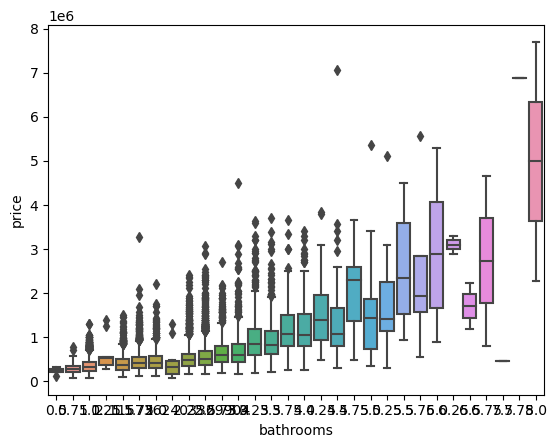

In [34]:
sns.boxplot(x='bathrooms', y= 'price', data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

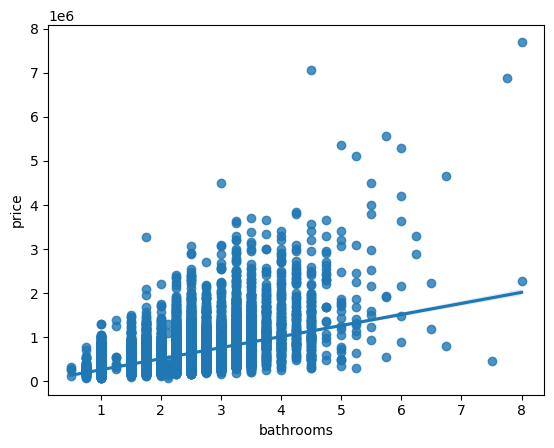

In [35]:
sns.regplot(x= 'bathrooms', y='price', data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

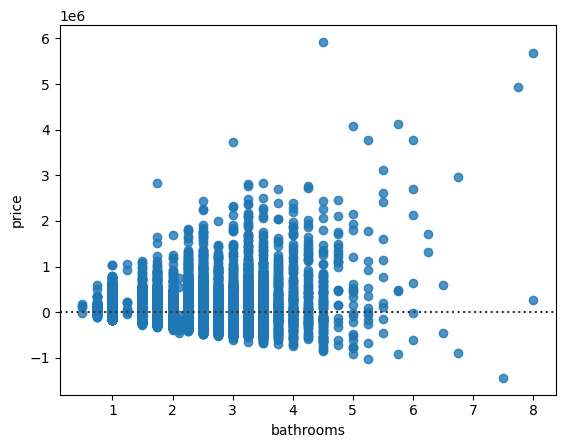

In [38]:
sns.residplot(x='bathrooms', y='price', data= df)

In [41]:
six= df.corr()['price'].sort_values()
six.tail(6)

C:\Users\CH\AppData\Local\Temp\ipykernel_15924\2067860132.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  six= df.corr()['price'].sort_values()


bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [52]:
from scipy import stats

In [56]:
coef, p_value= stats.pearsonr(df['bathrooms'], df['price'])
print(coef,"and",  p_value)

0.5257375111242716 and 0.0


In [58]:
coef, p_value= stats.pearsonr(df['sqft_living15'], df['price'])
print(coef, "and", p_value)

0.585378903579568 and 0.0


In [59]:
coef, p_value= stats.pearsonr(df['sqft_above'], df['price'])
print(coef, "and", p_value)

0.6055672983560781 and 0.0


In [60]:
coef, p_value= stats.pearsonr(df['grade'], df['price'])
print(coef, "and", p_value)

0.667434256020237 and 0.0


In [61]:
coef, p_value= stats.pearsonr(df['sqft_living'], df['price'])
print(coef, "and", p_value)

0.7020350546117999 and 0.0


In [64]:
#these are the independent variables to predict the dependent variable price
six.tail(6)

bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [65]:
lm= LinearRegression()
lm

LinearRegression()

In [66]:
x= df[['bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [67]:
lm.fit(x, df['price'])

LinearRegression()

In [68]:
lm.score(x, df['price'])

0.5441584243667871

In [70]:
yhat= lm.predict(x)
yp= pd.DataFrame(yhat, columns= ["Predictions"])
yp.head()

,Predictions
0,319847.567962
1,545219.203391
2,173028.709093
3,451872.275289
4,488587.892043


C:\Users\CH\AppData\Local\Temp\ipykernel_15924\3608601858.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label= "Actual Value")
C:\Users\CH\AppData\Local\Temp\ipykernel_15924\3608601858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

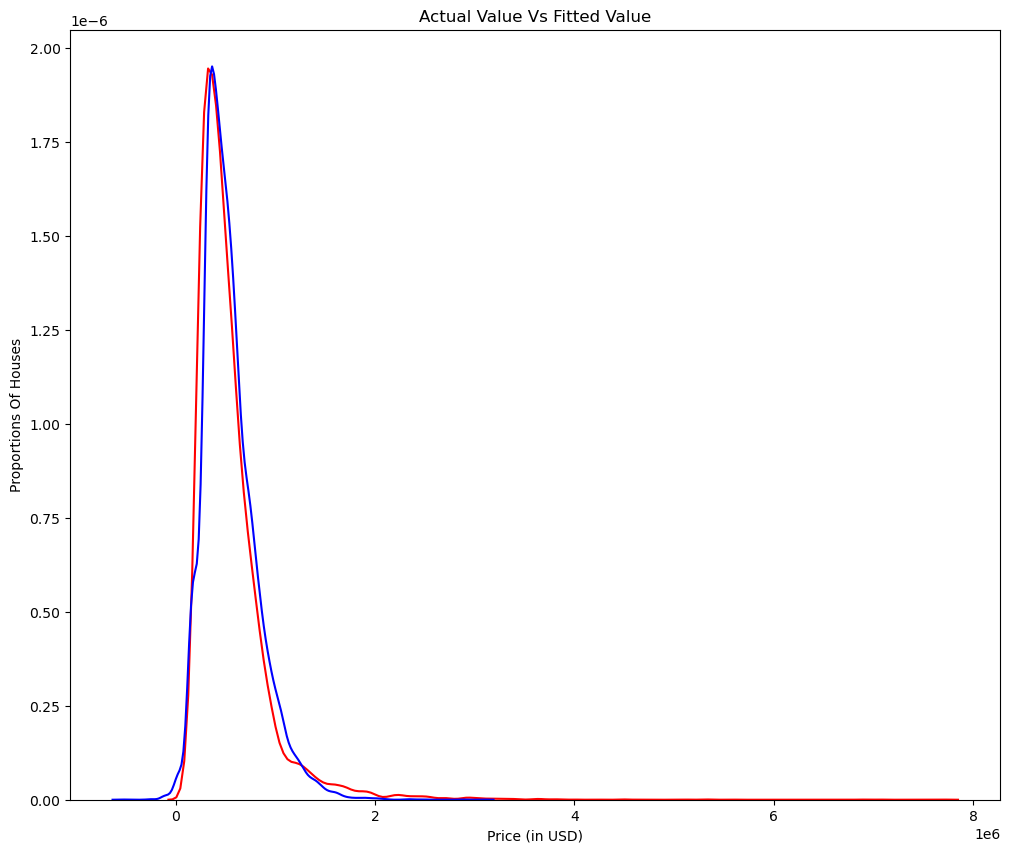

In [71]:
width= 12
height= 10
plt.figure(figsize= (width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label= "Actual Value")
sns.distplot(yhat, hist=False, color="b", label= "Fitted Value", ax=ax1)


plt.title('Actual Value Vs Fitted Value')
plt.xlabel('Price (in USD)')
plt.ylabel('Proportions Of Houses')


plt.show()
plt.close()

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mse= mean_squared_error(df['price'], yhat)
mse

61436569029.870995

In [75]:
Input=[ ('scaler', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),( 'model', LinearRegression())]

In [76]:
pipe= Pipeline(Input)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [77]:
pipe.fit(x, df['price'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [78]:
pipe.score(x, df['price'])

0.6231798866820983

In [80]:
pype= pipe.predict(x)
pip= pd.DataFrame(pype, columns= ["Predictions"])
pip.head()

,Predictions
0,348173.284620
1,466296.157485
2,517720.051761
3,407661.000227
4,445495.014269


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
#the independent variables
six.tail(6)

bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [85]:
X= df[['bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [86]:
Y= df['price']

In [87]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.15, random_state=1)

In [88]:
print(x_test.shape[0])
print(x_train.shape[0])

3242
18371


In [89]:
from sklearn.linear_model import Ridge

In [90]:
ridge= Ridge(alpha= 0.1)
ridge

Ridge(alpha=0.1)

In [91]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [92]:
ridge.score(x_test,y_test)

0.5466310954595426

In [93]:
poly= PolynomialFeatures(degree=2)
poly

PolynomialFeatures()

In [96]:
h= [['bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [ ]:
x_train_poly= poly.fit_transform(x_train(h))
x_test_poly= poly.fit_transform(x_test(h))

ridge.fit(x_train_poly, y_train)
ridge.score(x_test_poly, y_test)